In [20]:
import numpy as np
import pandas as pd
import recombination as rb
import timeit

n = 3
# 5 is the maximum to see improvements
Npoints = [500,1000,2000,5000,6000,10000,20000,50000,75000,100000,500000,800000,1000000,1500000,2000000]
N = max(Npoints)
sample = 70

x = np.random.randn(N,n)
theta = np.random.randn(n,)
y = np.matmul(x,theta)+np.random.randn(N,)*0.1

In [21]:
print(x.shape)
X = np.append(x,y[np.newaxis].T,1)
xy_sq = rb.tens_sq(X)

print(xy_sq.shape)
print(xy_sq[:,n+1:].shape)

N, d = xy_sq[:,n+1:].shape

(2000000, 3)
(2000000, 14)
(2000000, 10)


In [22]:
mean_t = 0.

time_rand = np.zeros((len(Npoints),sample))
iterations_rand = np.zeros((len(Npoints),sample))

min_t = np.zeros(len(Npoints))
max_t = np.zeros(len(Npoints))

for k in range(len(Npoints)):
    print("N = "+str(Npoints[k])) 
    
    COV = np.matmul(x[:Npoints[k],:].T,x[:Npoints[k],:])/Npoints[k]
    
    for i in range(sample):

        tic = timeit.default_timer()
        w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_Mor_reset(
                        xy_sq[:Npoints[k],n+1:]-np.mean(xy_sq[:Npoints[k],n+1:],0), d**3)
        time_rand[k,i] = (timeit.default_timer()-tic)*1000
        iterations_rand[k,i] = iterations

        ################ CHECK THE BARYCENTER IS THE SAME
        COV_recomb = np.zeros(COV.shape)
        jj = 0 
        for j in idx_star:
            tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
            COV_recomb += tmp * w_star[jj]
            jj += 1

        assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
        ################ CHECK FINISHED

        mean_t += time_rand[k,i]
        print("sample = ", i)
        print("time = ", time_rand[k,i], "ms")
        print("mean time = ", mean_t/(i+1), "ms")
        
    print("N = "+str(Npoints[k])) 
    
    mean_t = 0.
    
mean_t = np.mean(time_rand,1)
min_t = np.min(time_rand,1)
max_t = np.max(time_rand,1)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

N = 500
sample =  0
time =  4.211031000068033 ms
mean time =  4.211031000068033 ms
sample =  1
time =  6.661193000127241 ms
mean time =  5.436112000097637 ms
sample =  2
time =  0.8444100003544008 ms
mean time =  3.9055446668498917 ms
sample =  3
time =  7.863494000048377 ms
mean time =  4.895032000149513 ms
sample =  4
time =  4.340701000273839 ms
mean time =  4.784165800174378 ms
sample =  5
time =  2.8058549996785587 ms
mean time =  4.454447333425075 ms
sample =  6
time =  4.190278999885777 ms
mean time =  4.416709000062318 ms
sample =  7
time =  4.083173999788414 ms
mean time =  4.37501712502808 ms
sample =  8
time =  3.9453670001421415 ms
mean time =  4.327278222262976 ms
sample =  9
time =  3.8042249998397892 ms
mean time =  4.274972900020657 ms
sample =  10
time =  2.98249500019665 ms
mean time =  4.157474909127566 ms
sample =  11
time =  5.856279999989056 ms
mean time =  4.299042000032689 ms
sample =  12
time =  4.465035000066564 ms
mean time =  4.311810692342988 ms
sample =  1

In [23]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

sample_FC = 15
time_FC = np.zeros((len(Npoints),sample_FC))

for k in range(len(Npoints)):
    
    for i in range(sample_FC):
        tic = timeit.default_timer()
        Fast_Caratheodory(xy_sq[:Npoints[k],n+1:],np.ones(Npoints[k]),d+1)
        time_FC[k,i] = (timeit.default_timer()-tic)*1000
    print("N = "+str(Npoints[k])) 

print("mean FC = ", np.mean(time_FC,1), " ms")
print("std FC = ", np.std(time_FC,1))

N = 500
N = 1000
N = 2000
N = 5000
N = 6000
N = 10000
N = 20000
N = 50000
N = 75000
N = 100000
N = 500000
N = 800000
N = 1000000
N = 1500000
N = 2000000
mean FC =  [  8.681706     9.46087767  10.7201314   12.92262367  13.88174653
  15.56852953  18.16385647  26.8444858   33.0875628   39.69874107
 154.2915392  238.95102987 314.03755533 452.10985833 645.67758573]  ms
std FC =  [ 1.42119229  0.90981088  0.54851857  0.64975174  1.49998585  1.15993927
  0.64605247  1.57956789  1.67775942  1.87141999  3.5900189   7.90245317
 10.46224475 14.07315817  8.03136771]


In [24]:
print("Probability to be faster = ", 
            np.sum(time_rand<np.mean(time_FC,1)[np.newaxis].T,1)/sample*100, "%")
print("Probability to be 4x faster = ", 
            np.sum(time_rand<np.mean(time_FC,1)[np.newaxis].T/4,1)/sample*100, "%")

print("Standard deviation = ", np.std(time_rand,1))

Probability to be faster =  [ 97.14285714 100.          98.57142857  97.14285714 100.
 100.          98.57142857  87.14285714  78.57142857  80.
  54.28571429  64.28571429  65.71428571  61.42857143  21.42857143] %
Probability to be 4x faster =  [ 8.57142857  4.28571429 18.57142857 30.         30.         15.71428571
 27.14285714 17.14285714 14.28571429 22.85714286  0.          0.
  0.          0.          0.        ] %
Standard deviation =  [  1.5616045    1.17110097   2.89796909   2.49567431   2.04137897
   2.16366929   3.45557975   8.55275491  12.67389032  16.96443478
  97.45187185 126.3029693  146.84715624 292.8487795  668.66494389]


In [25]:
mean_t = 0.

time_TL = np.zeros((len(Npoints),sample_FC))
min_t = np.zeros(len(Npoints))
max_t = np.zeros(len(Npoints))


for k in range(len(Npoints)):
    print("N = "+str(Npoints[k])) 
    
    COV = np.matmul(x[:Npoints[k],:].T,x[:Npoints[k],:])/Npoints[k]
    
    for i in range(sample_FC):
        x_cp = np.copy(xy_sq[:Npoints[k],n+1:])
        
        tic = timeit.default_timer()
        w_star, idx_star, _, _, _, _, _ = rb.Tchernychova_Lyons(x_cp)
        time_TL[k,i] = (timeit.default_timer()-tic)*1000

        ################ CHECK THE BARYCENTER IS THE SAME
        COV_recomb = np.zeros(COV.shape)
        jj = 0 
        for j in idx_star:
            tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
            COV_recomb += tmp * w_star[jj]
            jj += 1

        assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
        ################ CHECK FINISHED
        
        mean_t += time_TL[k,i]
        print("sample = ", i)
        print("time = ", time_TL[k,i], "ms")
        print("mean time = ", mean_t/(i+1), "ms")
    print("N="+str(Npoints[k])) 
    mean_t = 0.
    
mean_t = np.mean(time_TL,1)
min_t = np.min(time_TL,1)
max_t = np.max(time_TL,1)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

N = 500
sample =  0
time =  9.95269399982135 ms
mean time =  9.95269399982135 ms
sample =  1
time =  7.399825999982568 ms
mean time =  8.676259999901959 ms
sample =  2
time =  8.155254000030254 ms
mean time =  8.502591333278056 ms
sample =  3
time =  7.021457000064402 ms
mean time =  8.132307749974643 ms
sample =  4
time =  7.731852999768307 ms
mean time =  8.052216799933376 ms
sample =  5
time =  6.014405000314582 ms
mean time =  7.712581499996911 ms
sample =  6
time =  7.5392659996396105 ms
mean time =  7.68782214280301 ms
sample =  7
time =  6.191901999955007 ms
mean time =  7.50083212494701 ms
sample =  8
time =  7.161716000155138 ms
mean time =  7.463152555525691 ms
sample =  9
time =  6.489333999979863 ms
mean time =  7.365770699971108 ms
sample =  10
time =  6.990969000071345 ms
mean time =  7.331697818162039 ms
sample =  11
time =  7.067319999805477 ms
mean time =  7.309666333298992 ms
sample =  12
time =  7.064536000143562 ms
mean time =  7.290810153825498 ms
sample =  13
time

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  10
time =  9.53736499968727 ms
mean time =  7.877387090833178 ms
sample =  11
time =  9.265357999993284 ms
mean time =  7.993051333263186 ms
sample =  12
time =  8.18101899994872 ms
mean time =  8.00751038454669 ms
sample =  13
time =  7.5812939999195805 ms
mean time =  7.9770663570733245 ms
sample =  14
time =  7.0042749998719955 ms
mean time =  7.912213599926569 ms
N=1000
N = 2000
sample =  0
time =  8.24567300014678 ms
mean time =  8.24567300014678 ms
sample =  1
time =  7.482000999971206 ms
mean time =  7.863837000058993 ms
sample =  2
time =  7.569475999844144 ms
mean time =  7.765716666654043 ms
sample =  3
time =  7.398103000014089 ms
mean time =  7.673813249994055 ms
sample =  4
time =  7.238894999773038 ms
mean time =  7.586829599949851 ms
sample =  5
time =  7.63210800005254 ms
mean time =  7.594375999966966 ms
sample =  6
time =  7.227821000014956 ms
mean time =  7.542010999973821 ms
sample =  7
time =  7.602570000017295 ms
mean time =  7.549580874979256 ms
sample 

In [26]:
mean_t = 0.

time_log = np.zeros((len(Npoints),sample))

min_t = np.zeros(len(Npoints))
max_t = np.zeros(len(Npoints))

for k in range(len(Npoints)):
    print("N = "+str(Npoints[k])) 
    
    COV = np.matmul(x[:Npoints[k],:].T,x[:Npoints[k],:])/Npoints[k]
    
    for i in range(sample):
        x_cp = np.copy(xy_sq[:Npoints[k],n+1:])
        
        tic = timeit.default_timer()
        w_star, idx_star, _, _, _, _, _ = rb.recomb_log(x_cp)
        time_log[k,i] = (timeit.default_timer()-tic)*1000

        ################ CHECK THE BARYCENTER IS THE SAME
        COV_recomb = np.zeros(COV.shape)
        jj = 0 
        for j in idx_star:
            tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
            COV_recomb += tmp * w_star[jj]
            jj += 1
        
        assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
        ################ CHECK FINISHED
        
        mean_t += time_log[k,i]
        print("sample = ", i)
        print("time = ", time_log[k,i], "ms")
        print("mean time = ", mean_t/(i+1), "ms")
    print("N="+str(Npoints[k])) 
    mean_t = 0.
    
mean_t = np.mean(time_log,1)
min_t = np.min(time_log,1)
max_t = np.max(time_log,1)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

N = 500
sample =  0
time =  9.02439100036645 ms
mean time =  9.02439100036645 ms
sample =  1
time =  7.324267000058171 ms
mean time =  8.17432900021231 ms
sample =  2
time =  2.188404000207811 ms
mean time =  6.179020666877477 ms
sample =  3
time =  3.97214399981749 ms
mean time =  5.62730150011248 ms
sample =  4
time =  4.173368000010669 ms
mean time =  5.336514800092118 ms
sample =  5
time =  4.354378999778419 ms
mean time =  5.172825500039835 ms
sample =  6
time =  3.438035000272066 ms
mean time =  4.9249982857872965 ms
sample =  7
time =  4.743297000004532 ms
mean time =  4.902285625064451 ms
sample =  8
time =  3.751827999622037 ms
mean time =  4.7744570000152935 ms
sample =  9
time =  2.9648569998244056 ms
mean time =  4.593496999996205 ms
sample =  10
time =  4.488871000376093 ms
mean time =  4.583985545485286 ms
sample =  11
time =  3.2477429999744345 ms
mean time =  4.472632000026048 ms
sample =  12
time =  4.099507999853813 ms
mean time =  4.443930153858953 ms
sample =  13
ti

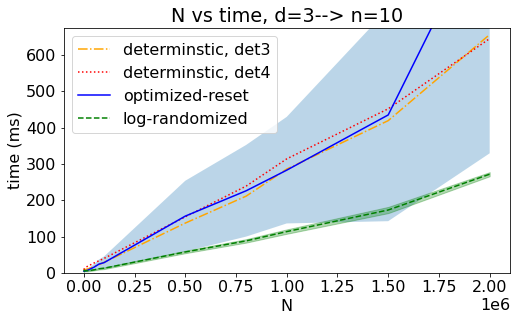

In [28]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8,4.5))

plt.plot(Npoints,np.mean(time_TL,1), '-.', label="determinstic, det3", color='orange')
plt.plot(Npoints,np.mean(time_FC,1), ':', label="determinstic, det4", color='red')

plt.plot(Npoints,np.mean(time_rand,1), '-', label="optimized-reset", color='blue')
error = np.std(time_rand,axis=1)
plt.fill_between(Npoints, 
                 np.mean(time_rand,1)-error, 
                 np.mean(time_rand,1)+error, 
                 alpha=0.3)

plt.plot(Npoints,np.mean(time_log,1), '--', label="log-randomized", color='green')
plt.fill_between(Npoints, 
                 np.mean(time_log,1)-np.std(time_log,1), 
                 np.mean(time_log,1)+np.std(time_log,1), 
                 alpha=0.3, color='green')

plt.xlabel('N')
plt.ylabel('time (ms)')

plt.ylim([0,np.max(time_FC)])

plt.title('N vs time, d='+str(n)+'--> n='+str(d))
# plt.xscale('log') 
# plt.yscale('log') 
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()

# fig.tight_layout()
# plt.savefig('Synthetic_cov_Nvsn_n3d10.pdf', bbox_inches='tight')
plt.show()
